In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

In [2]:
# Data loading
df = pd.read_csv('data.csv')

In [3]:
# Let's explore what the columns names are
df.columns

Index(['source_country', 'source_customer', 'customer', 'reporting_year',
       'country', 'division', 'factor_year', 'start_date', 'end_date', 'scope',
       'vehicle_type', 'vehicle_size', 'fuel_type', 'month', 'year',
       'reporting_period', 'source', 'laden', 'gross_net_cv', 'include_rf',
       'upstream_downstream', 'e_a', 'unit_transform', 'multiplication_factor',
       'primary_key', 'data_type', 'scope_text', 'emission_scope', 'cost_ppm',
       'litres', 'passenger_km', 'tonne_km', 'kgco2e', 'cost', 'passenger',
       'tonne', 'ppm', 'km', 'miles', 'site', 'meter_number', 'utility',
       'renewable', 'cbm', 'kg', 'kwh', 'current_year', 'base_year'],
      dtype='object')

In [44]:
columns = df.columns
print(str(len(columns)) + ' number of cols')

49 number of cols


In [4]:
# Let's get data types now of cols
df.dtypes

source_country            object
source_customer           object
customer                  object
reporting_year             int64
country                   object
division                  object
factor_year                int64
start_date                object
end_date                  object
scope                      int64
vehicle_type              object
vehicle_size              object
fuel_type                 object
month                      int64
year                       int64
reporting_period           int64
source                    object
laden                    float64
gross_net_cv              object
include_rf               float64
upstream_downstream      float64
e_a                       object
unit_transform            object
multiplication_factor    float64
primary_key               object
data_type                 object
scope_text                object
emission_scope            object
cost_ppm                 float64
litres                   float64
passenger_

In [5]:
# interested in seeing how many values there are in scope. Its a universal description could be used as a dimension
df['scope_text'].unique()

array(['Stationary Combustion', 'Fuel- and Energy-related Activities',
       'Purchased Electricity', 'Purchased Heat - Purchased Steam',
       'Purchased Goods and Services', 'Waste Generated in Operations',
       'Mobile Combustion'], dtype=object)

In [6]:
# Let's create a description of what the scopes are. Found online. 
def label_scope(value):
    if value == 1:
        return "Scope 1: Direct Emmissions"
    elif value == 2:
        return "Scope 2: Indirect Emissions from Electricity"
    elif value == 3:
        return "Scope 3: Other Indirect Emissions"
    else:
        return "Invalid Scope"
    
# Creating new column, a descriptive value for scope instead.       
df['scope_description'] = df['scope'].apply(label_scope)

In [7]:
df['scope_description'] = df['scope'].apply(label_scope)

In [8]:
# looks like country UK for both country and source_country only and only 1 customer. That's good to know!
print(df['source_country'].unique())
print(df['country'].unique())
print(df['customer'].unique())

['uk']
['uk']
['QuantumGrid Technologies']


In [9]:
# Print first and last few rows to see what is in data.
print(df.head())
print(df.tail())

  source_country source_customer                  customer  reporting_year  \
0             uk     quantumgrid  QuantumGrid Technologies            2021   
1             uk     quantumgrid  QuantumGrid Technologies            2021   
2             uk     quantumgrid  QuantumGrid Technologies            2021   
3             uk     quantumgrid  QuantumGrid Technologies            2022   
4             uk     quantumgrid  QuantumGrid Technologies            2022   

  country     division  factor_year  start_date    end_date  scope  ...  site  \
0      uk  City Office         2021  01/12/2021  31/12/2021      1  ...  Demo   
1      uk  City Office         2021  01/12/2021  31/12/2021      1  ...  Demo   
2      uk  City Office         2021  01/12/2021  31/12/2021      1  ...  Demo   
3      uk  City Office         2022  01/08/2022  31/08/2022      1  ...  Demo   
4      uk  City Office         2022  01/08/2022  31/08/2022      1  ...  Demo   

  meter_number     utility  renewable  cbm  

In [10]:
# Let's do some row counting.
print(str(df.shape[0]) + " number of rows in dataset")
print(str(df['primary_key'].nunique()))

1704 number of rows in dataset
663


In [11]:
# data description of each col. 
df.describe()

,reporting_year,factor_year,scope,month,year,reporting_period,laden,include_rf,upstream_downstream,multiplication_factor,...,tonne,ppm,km,miles,meter_number,cbm,kg,kwh,current_year,base_year
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,0.0,0.0,0.0,2.520000e+02,...,0.0,0.0,0.0,231.000000,0.0,36.000000,108.000000,288.000000,1704.000000,1704.000000
mean,2022.000000,2022.000000,1.295775,6.693662,2022.220070,6.376761,NaN,NaN,NaN,1.000000e-03,...,NaN,NaN,NaN,77543.771774,NaN,101.887046,20.127084,2090.956529,0.333333,0.333333
std,0.816736,0.816736,0.541268,3.352643,0.915859,3.449163,NaN,NaN,NaN,6.518159e-19,...,NaN,NaN,NaN,55927.009217,NaN,35.129162,25.542046,2906.412215,0.471543,0.471543
min,2021.000000,2021.000000,1.000000,1.000000,2021.000000,1.000000,NaN,NaN,NaN,1.000000e-03,...,NaN,NaN,NaN,8724.802560,NaN,46.179310,0.853909,0.003087,0.000000,0.000000
25%,2021.000000,2021.000000,1.000000,4.000000,2021.000000,3.000000,NaN,NaN,NaN,1.000000e-03,...,NaN,NaN,NaN,35280.000000,NaN,70.344828,4.679084,37.717560,0.000000,0.000000
50%,2022.000000,2022.000000,1.000000,7.000000,2022.000000,6.000000,NaN,NaN,NaN,1.000000e-03,...,NaN,NaN,NaN,65280.000000,NaN,101.379310,7.645934,582.575376,0.000000,0.000000
75%,2023.000000,2023.000000,2.000000,10.000000,2023.000000,9.000000,NaN,NaN,NaN,1.000000e-03,...,NaN,NaN,NaN,104000.000000,NaN,132.600000,29.075527,2995.697364,1.000000,1.000000
max,2023.000000,2023.000000,3.000000,12.000000,2024.000000,12.000000,NaN,NaN,NaN,1.000000e-03,...,NaN,NaN,NaN,283200.000000,NaN,163.727586,112.427170,10642.583650,1.000000,1.000000


In [48]:
# Getting Null counts of each column to get a better idea 
print(df.isnull().sum())

# Good thing is kgco2e, the target metric does not have any nulls. 

num_columns_with_no_missing_values = len(df.columns[df.isnull().sum() == 0])
print(num_columns_with_no_missing_values)


source_country              0
source_customer             0
customer                    0
reporting_year              0
country                     0
division                    0
factor_year                 0
start_date                  0
end_date                    0
scope                       0
vehicle_type             1044
vehicle_size             1044
fuel_type                1044
month                       0
year                        0
reporting_period            0
source                   1044
laden                    1704
gross_net_cv             1044
include_rf               1704
upstream_downstream      1704
e_a                         0
unit_transform           1452
multiplication_factor    1452
primary_key                 0
data_type                   0
scope_text                  0
emission_scope              0
cost_ppm                 1704
litres                   1632
passenger_km             1704
tonne_km                 1704
kgco2e                      0
cost      

In [13]:
df['scope_text'].unique()

array(['Stationary Combustion', 'Fuel- and Energy-related Activities',
       'Purchased Electricity', 'Purchased Heat - Purchased Steam',
       'Purchased Goods and Services', 'Waste Generated in Operations',
       'Mobile Combustion'], dtype=object)

In [14]:
def set_renewable_flag(row):
    if row == 'y':
        return True
    else:
        return False

df['renewable_flag'] = df['renewable'].apply(set_renewable_flag)


In [15]:
# Convert end_date to datetime format
warnings.simplefilter("ignore")
df['end_date'] = pd.to_datetime(df['end_date'])

In [16]:
def line_chart_plotting(df, dimension, metric):
    # Convert end_date to datetime format
    df['end_date'] = pd.to_datetime(df['end_date'])

    # Group by 'end_date' and the specified dimension, and sum the specified metric
    metric_per_date_grouped = df.groupby(['end_date', dimension])[metric].sum().reset_index()

    # Calculate the total for the specified metric for each end_date
    total_metric_per_date = metric_per_date_grouped.groupby('end_date')[metric].sum().reset_index(name=f'total_{metric}')

    # Joining the total back onto the original dataframe
    metric_per_date_grouped = metric_per_date_grouped.merge(total_metric_per_date, on='end_date')

    # Calculate the share value for each group
    metric_per_date_grouped['share_value'] = (metric_per_date_grouped[metric] / metric_per_date_grouped[f'total_{metric}']) * 100

    # plotting metrics
    plt.figure(figsize=(9, 3))

    # Get unique values from the specified dimension for plotting
    unique_values = metric_per_date_grouped[dimension].unique()
    for unique_value in unique_values:
        # Filter the data for the current unique value of the dimension
        filtered_data = metric_per_date_grouped[metric_per_date_grouped[dimension] == unique_value]
        plt.plot(filtered_data['end_date'], filtered_data['share_value'], marker='o', label=str(unique_value))

    # Set the title and labels
    plt.title(f'Share of {metric} by End Date and {dimension}')
    plt.xlabel('End Date')
    plt.ylabel(f'Percentage Share of {metric} (%)')

    # Adding material and displaying plot by plt.show()
    plt.grid(True)
    plt.legend(title=dimension)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()


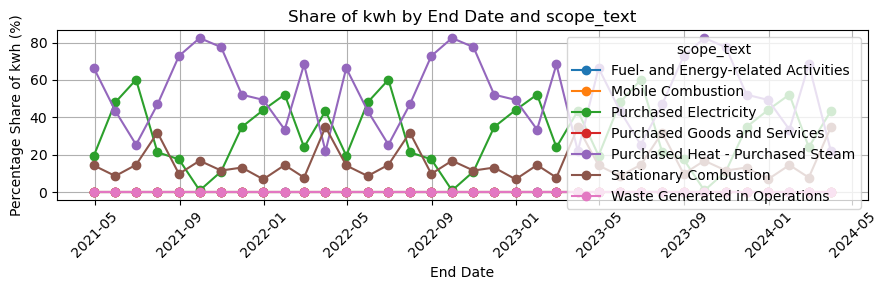

In [17]:
line_chart_plotting(df, 'scope_text', 'kwh')

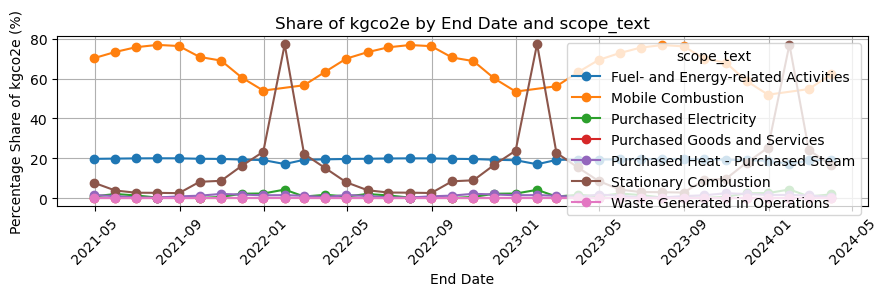

In [18]:
line_chart_plotting(df, 'scope_text', 'kgco2e')

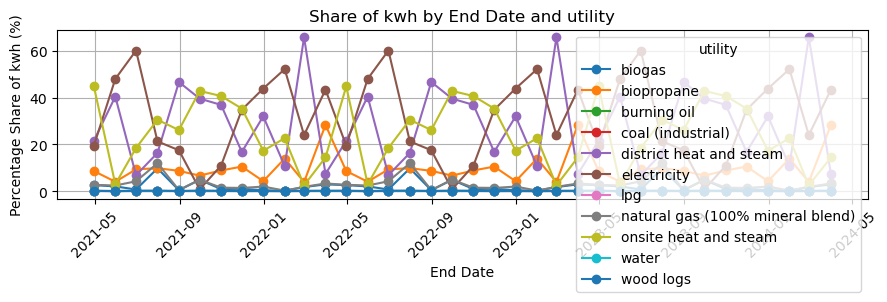

In [19]:
line_chart_plotting(df, 'utility', 'kwh')

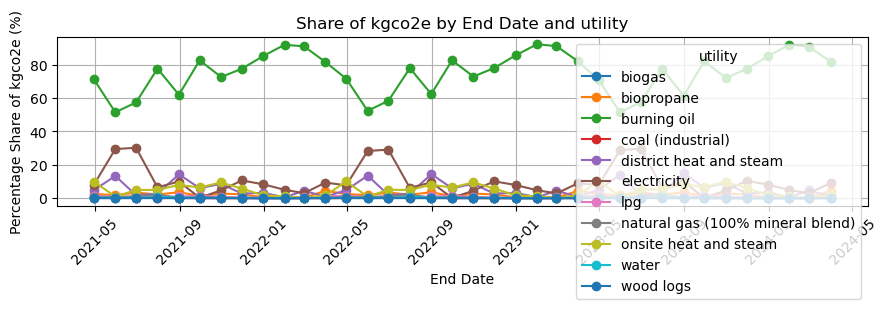

In [20]:
line_chart_plotting(df, 'utility', 'kgco2e')

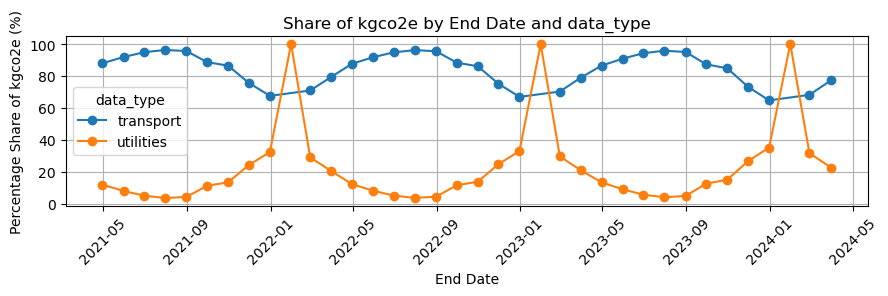

In [21]:
line_chart_plotting(df, 'data_type', 'kgco2e')

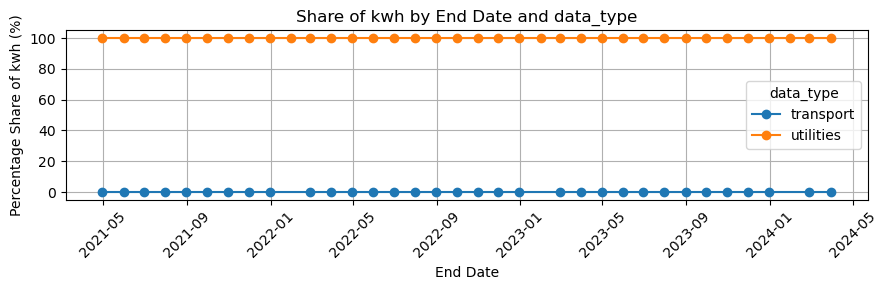

In [22]:
line_chart_plotting(df, 'data_type', 'kwh')

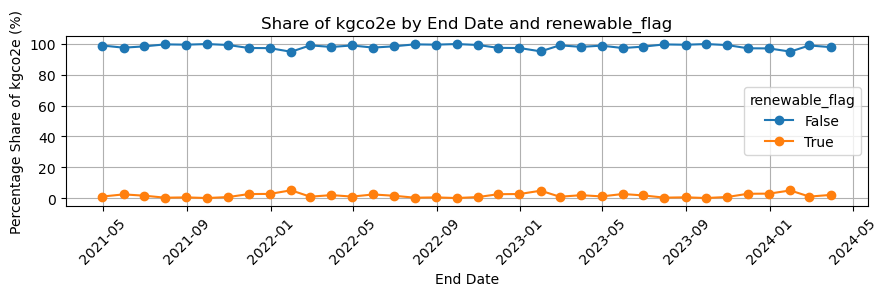

In [23]:
line_chart_plotting(df, 'renewable_flag', 'kgco2e')

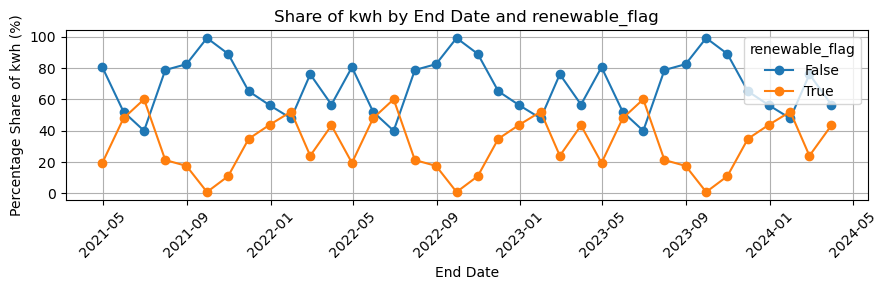

In [24]:
line_chart_plotting(df, 'renewable_flag', 'kwh')

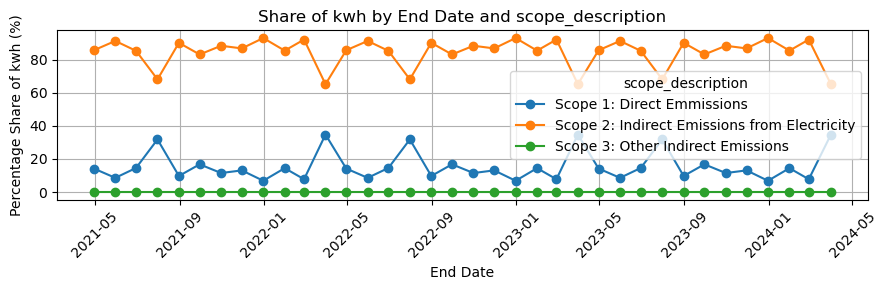

In [25]:
line_chart_plotting(df, 'scope_description', 'kwh')

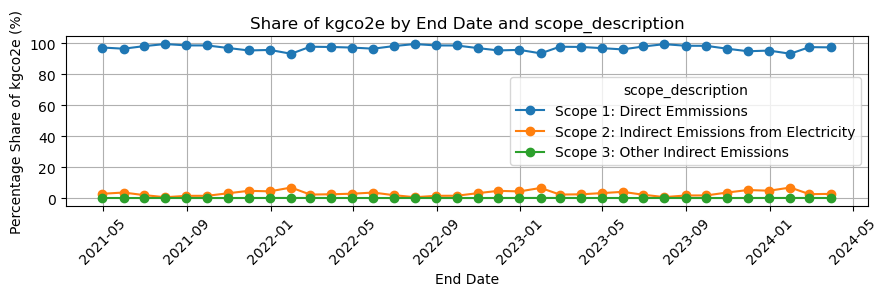

In [26]:
line_chart_plotting(df, 'scope_description', 'kgco2e')

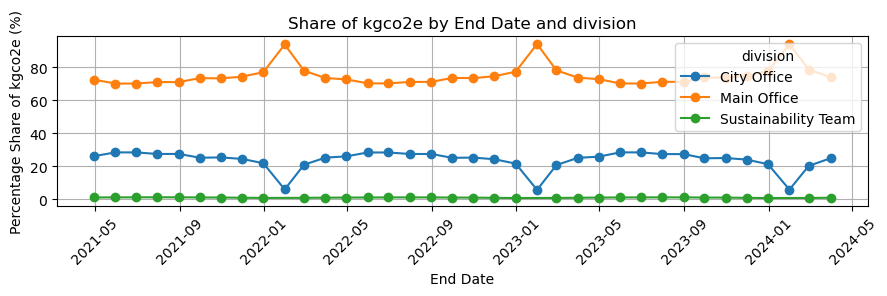

In [27]:
line_chart_plotting(df, 'division', 'kgco2e')

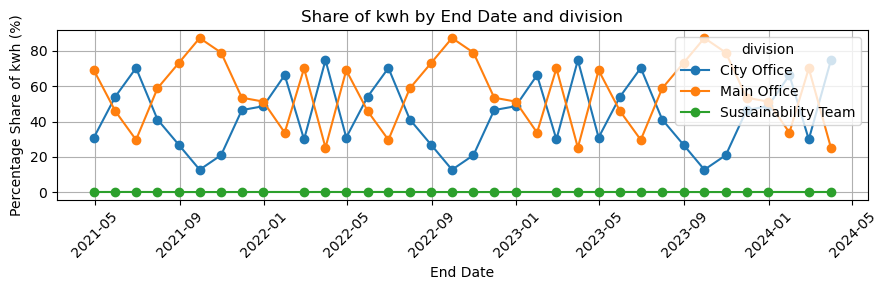

In [28]:
line_chart_plotting(df, 'division', 'kwh')